# Q-Learning: A Complete Guide from Fundamentals to Implementation

## Table of Contents
1. [Machine Learning Fundamentals](#machine-learning-fundamentals)
2. [Introduction to Reinforcement Learning](#introduction-to-reinforcement-learning)
3. [Q-Learning Basics](#q-learning-basics)
4. [Key Concepts](#key-concepts)
5. [Building Q-Learning Step-by-Step](#building-q-learning-step-by-step)

---

## Machine Learning Fundamentals

### What is Machine Learning?

Machine learning is a subset of artificial intelligence where computers learn patterns from data without being explicitly programmed. Instead of following hard-coded rules, ML systems improve their performance through experience.

**Three main types of machine learning:**

- **Supervised Learning**: Learning from labeled data (e.g., predicting house prices given historical data with known prices)
- **Unsupervised Learning**: Finding patterns in unlabeled data (e.g., grouping customers by behavior)
- **Reinforcement Learning**: Learning through interaction and rewards (e.g., training a game-playing AI)

Think of it like teaching a dog: supervised learning is like showing the dog pictures of treats; unsupervised learning is like the dog organizing toys into groups; reinforcement learning is like rewarding the dog when it does the right thing.

### What is Deep Learning?

Deep learning is a specialized subset of machine learning that uses neural networks with many layers (hence "deep"). These networks are inspired by how brains work and are particularly good at learning complex patterns in images, text, and other data.

**Visual Example:**
```
Input Layer → Hidden Layers (many!) → Output Layer
    [pixel]     [features]           [prediction]
```

Deep learning powers modern AI systems like ChatGPT, image recognition, and self-driving cars. However, **Q-Learning doesn't require deep learning** — we'll start with a simple table-based approach.

### What is Reinforcement Learning?

Reinforcement learning (RL) is learning through interaction with an environment. An **agent** takes actions in an environment, receives rewards or penalties, and learns to maximize total reward over time.

**The Core Loop:**
```
Agent takes action → Environment changes → Agent receives reward → Agent learns
         ↑_________________________________↓
```

Think of it like teaching a robot to play chess: you don't tell it which moves to make. Instead, you reward it for winning and penalize it for losing. Over time, it figures out good strategies.

**Real-world examples:**
- AlphaGo (learning to play Go)
- Self-driving cars (learning to drive safely)
- Video game AIs (learning to beat games)
- Robot control (learning to walk or manipulate objects)

---

## Introduction to Reinforcement Learning

### The Reinforcement Learning Problem

In RL, we have:

**Agent**: The learner that makes decisions (like a robot or game character)

**Environment**: The world the agent interacts with (like a game board or physical space)

**State (S)**: The current situation the agent observes (like positions of pieces on a board)

**Action (A)**: What the agent can do (like moving left, right, up, or down)

**Reward (R)**: Feedback from the environment (positive for good actions, negative for bad ones)

**Policy (π)**: The agent's strategy for choosing actions given states

```
┌─────────────┐
│   AGENT     │  ← Makes decisions
└──────┬──────┘
       │ Action
       ↓
┌─────────────┐
│ ENVIRONMENT │  ← Responds to actions
└──────┬──────┘
       │ State, Reward
       ↑
```

### The Goal

The agent wants to learn a **policy** — a strategy that maps states to actions — that maximizes the total reward over time. This is called the **return** or **cumulative reward**.

---

## Q-Learning Basics

### What is Q-Learning?

Q-Learning is a specific reinforcement learning algorithm that learns the **value** of taking each action in each state. The "Q" stands for "Quality" — it estimates how good an action is in a given state.

Instead of learning a policy directly, Q-Learning learns a function Q(state, action) that answers: *"If I'm in this state and take this action, how much reward will I get in the future?"*

**Why is this useful?** Once you know the value of each action, choosing the best action is simple — just pick the action with the highest value!

### The Q-Table Concept

Imagine a table where:
- **Rows** represent different states
- **Columns** represent different actions
- **Cells** contain the estimated value (Q-value) of taking that action in that state

```
           Action1  Action2  Action3
State 1      0.5      0.8      0.3
State 2      0.2      0.1      0.9
State 3      0.7      0.4      0.6
```

When the agent is in State 1, it looks at that row and sees Action 2 has the highest value (0.8), so it takes that action.

### The Learning Rule

Q-Learning updates this table using the **Q-Learning Update Rule**:

```
Q(s,a) ← Q(s,a) + α[R + γ·max(Q(s',a')) - Q(s,a)]
```

Where:
- **Q(s,a)** = current estimate of action value
- **α** (alpha) = learning rate (how much to update; 0.1 means update by 10%)
- **R** = immediate reward received
- **γ** (gamma) = discount factor (how much we care about future rewards; 0.99 means future rewards matter)
- **s'** = next state
- **max(Q(s',a'))** = best possible value from the next state

**Intuition**: Update the Q-value by moving it toward (Reward + best future value). The bigger the difference, the bigger the update.

---



## Key Concepts

### Agents
An agent is an entity that perceives its environment and takes actions. In Q-Learning, the agent has a brain (the Q-table) that stores what it has learned about the value of each action in each state.

### Policies
A policy is a rule for choosing actions. The **greedy policy** always picks the best action according to Q-values. The **ε-greedy policy** usually picks the best action but sometimes picks a random one (probability ε) to explore new possibilities.

### Environments & Worlds
An environment is the space where the agent acts. It follows rules (like physics) and determines what reward the agent gets. Common environments include grids, mazes, games, and simulations.

### Libraries
We'll use:
- **NumPy**: For numerical computations and arrays (storing Q-values)
- **Matplotlib**: For plotting learning curves and visualizing results
- **OpenAI Gym** (or Gymnasium): Provides standard environments to train agents on

### The Learning Journey
Here's what we'll build:
1. **Create an environment** (a simple grid world)
2. **Initialize a Q-table** (set all values to zero)
3. **Choose exploration strategy** (ε-greedy)
4. **Implement Q-Learning update** (apply the update rule)
5. **Train the agent** (run many episodes)
6. **Evaluate performance** (see how well it learned)
7. **Visualize results** (plot learning curves and agent behavior)

---

## Building Q-Learning Step-by-Step

### Setup: Import Libraries and Create Environment

Before we start, let's set up our tools. We'll use NumPy for numerical work, Matplotlib for visualizations, and create a simple grid world environment.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import random
from collections import defaultdict

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

Let's create a simple environment where our agent learns. Imagine a 5×5 grid with a goal position and some obstacles. The agent starts at the top-left and must reach the goal (bottom-right).

This is a simplified world where the agent learns spatial navigation — a fundamental RL task. We define the rules: moving in valid directions is allowed, hitting boundaries doesn't move, and reaching the goal gives a big reward.
###  1: Understanding the GridWorld Environment

In [1]:
class GridWorld:
    """
    A simple 5x5 grid environment.
    - Agent starts at top-left (0, 0)
    - Goal is at bottom-right (4, 4)
    - Agent can move up, down, left, right
    - Rewards: +1 for each step, +100 for reaching goal, -10 for hitting boundary
    """
    
    def __init__(self, grid_size=5):
        self.grid_size = grid_size
        self.start_pos = (0, 0)
        self.goal_pos = (grid_size - 1, grid_size - 1)
        self.agent_pos = self.start_pos
        
        # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.actions = ['Up', 'Down', 'Left', 'Right']
        self.action_deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    def reset(self):
        """Reset agent to start position"""
        self.agent_pos = self.start_pos
        return self._get_state()
    
    def _get_state(self):
        """Convert position to state number (for Q-table indexing)"""
        row, col = self.agent_pos
        return row * self.grid_size + col
    
    def step(self, action):
        """
        Execute action and return (next_state, reward, done)
        """
        row, col = self.agent_pos
        dr, dc = self.action_deltas[action]
        new_row, new_col = row + dr, col + dc
        
        # Check boundaries
        if new_row < 0 or new_row >= self.grid_size or new_col < 0 or new_col >= self.grid_size:
            return self._get_state(), -10, False  # Hit wall, small penalty
        
        self.agent_pos = (new_row, new_col)
        reward = 1  # Small reward for each step
        
        # Check if reached goal
        if self.agent_pos == self.goal_pos:
            reward = 100  # Big reward for reaching goal
            done = True
        else:
            done = False
        
        return self._get_state(), reward, done
    
    def render(self):
        """Print grid visualization"""
        grid = [['.' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        row, col = self.start_pos
        grid[row][col] = 'S'
        row, col = self.goal_pos
        grid[row][col] = 'G'
        row, col = self.agent_pos
        grid[row][col] = 'A'
        for row in grid:
            print(' '.join(row))
        print()

# Create environment
env = GridWorld(grid_size=5)
print("GridWorld environment created")
print(f"Grid size: {env.grid_size}×{env.grid_size}")
print(f"Total states: {env.grid_size * env.grid_size}")
print(f"Total actions: {len(env.actions)}")
print(f"Actions: {env.actions}")


GridWorld environment created
Grid size: 5×5
Total states: 25
Total actions: 4
Actions: ['Up', 'Down', 'Left', 'Right']



###  2: Initializing the Q-Table

Now we create the brain of our agent — the Q-table. This is a table that stores estimates of how good each action is in each state. Initially, we don't know anything, so we start with zeros.

Think of this like a student starting school with a blank notebook. As the student learns, they fill in the notebook. Similarly, as the agent experiences the world, it fills in the Q-table.


In [31]:
def initialize_q_table(num_states, num_actions):
    """
    Create a Q-table initialized with zeros.
    Shape: (num_states, num_actions)
    """
    return np.zeros((num_states, num_actions))

# Create Q-table
num_states = env.grid_size * env.grid_size
num_actions = len(env.actions)
q_table = initialize_q_table(num_states, num_actions)

print("✓ Q-table initialized")
print(f"✓ Q-table shape: {q_table.shape}")
print(f"\nFirst few rows of Q-table (all zeros initially):")
print(q_table[:3])
print(f"\n... (and {num_states - 3} more states)")


✓ Q-table initialized
✓ Q-table shape: (25, 4)

First few rows of Q-table (all zeros initially):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

... (and 22 more states)


###  3: The ε-Greedy Exploration Strategy

The agent needs to balance two competing goals: **exploitation** (using what it knows works) and **exploration** (trying new things to learn). The ε-greedy strategy is a simple way to balance this.

With probability ε, the agent takes a random action (explores). With probability 1-ε, it takes the action with the highest Q-value (exploits). Early on, ε is high (explore a lot). As learning progresses, ε decreases (exploit more).


In [32]:
def choose_action_epsilon_greedy(state, q_table, epsilon, num_actions):
    """
    Choose action using ε-greedy strategy:
    - With probability epsilon: pick random action (explore)
    - With probability 1-epsilon: pick best action (exploit)
    """
    if random.random() < epsilon:
        # Explore: random action
        return random.randint(0, num_actions - 1)
    else:
        # Exploit: best action according to Q-table
        return np.argmax(q_table[state])

# Test the exploration strategy
print("✓ ε-Greedy strategy defined")
print("\nExample actions with ε=0.5:")
for _ in range(10):
    action = choose_action_epsilon_greedy(0, q_table, epsilon=0.5, num_actions=num_actions)
    print(f"  Action: {env.actions[action]}")


✓ ε-Greedy strategy defined

Example actions with ε=0.5:
  Action: Up
  Action: Up
  Action: Up
  Action: Up
  Action: Up
  Action: Up
  Action: Left
  Action: Up
  Action: Up
  Action: Up


###  4: Implementing the Q-Learning Update Rule

This is the core of Q-Learning — the update rule that teaches the agent. After each action, we update the Q-value using the formula we discussed earlier. This is where learning happens!

The update rule says: "The value of an action is the immediate reward plus the best future value we can get from the next state, discounted by how much we trust future predictions."

In [33]:
def update_q_table(q_table, state, action, reward, next_state, alpha, gamma):
    """
    Update Q-table using Q-Learning update rule:
    Q(s,a) ← Q(s,a) + α[R + γ·max(Q(s',a')) - Q(s,a)]
    
    Parameters:
    - q_table: the Q-table to update
    - state: current state
    - action: action taken
    - reward: reward received
    - next_state: state we transitioned to
    - alpha: learning rate (0.1 = update by 10%)
    - gamma: discount factor (0.99 = future rewards matter)
    """
    # Current Q-value estimate
    current_q = q_table[state, action]
    
    # Best possible Q-value from next state
    max_next_q = np.max(q_table[next_state])
    
    # Temporal difference (prediction error)
    td_error = reward + gamma * max_next_q - current_q
    
    # Update Q-value
    new_q = current_q + alpha * td_error
    q_table[state, action] = new_q
    
    return td_error

print("✓ Q-Learning update rule implemented")
print("\nUpdate rule: Q(s,a) ← Q(s,a) + α[R + γ·max(Q(s',a')) - Q(s,a)]")

✓ Q-Learning update rule implemented

Update rule: Q(s,a) ← Q(s,a) + α[R + γ·max(Q(s',a')) - Q(s,a)]


###  5: Training the Agent — One Episode

Let's run a single episode (one journey from start to goal) and see how the Q-table gets updated. An episode shows us the agent trying to reach the goal and learning from each experience.

During one episode, the agent takes a sequence of actions, receives rewards, and updates the Q-table. By the end, some Q-values have changed from zero — the agent is learning!


In [34]:
def train_episode(env, q_table, alpha=0.1, gamma=0.99, epsilon=0.1, max_steps=100):
    """
    Run one episode of training:
    1. Reset environment
    2. Repeat until goal reached or max_steps exceeded:
       - Choose action using ε-greedy
       - Take action in environment
       - Update Q-table
    3. Return cumulative reward
    """
    state = env.reset()
    total_reward = 0
    steps = 0
    experiences = []
    
    for _ in range(max_steps):
        # Choose action
        action = choose_action_epsilon_greedy(state, q_table, epsilon, num_actions)
        
        # Take action
        next_state, reward, done = env.step(action)
        
        # Update Q-table
        td_error = update_q_table(q_table, state, action, reward, next_state, alpha, gamma)
        
        # Track experience
        experiences.append({
            'state': state,
            'action': env.actions[action],
            'reward': reward,
            'next_state': next_state,
            'td_error': td_error
        })
        
        total_reward += reward
        steps += 1
        state = next_state
        
        if done:
            break
    
    return total_reward, steps, experiences

# Run one episode
print("Running one training episode...\n")
reward_episode1, steps_episode1, exp_episode1 = train_episode(
    env, q_table, alpha=0.1, gamma=0.99, epsilon=0.2
)

print(f"✓ Episode completed")
print(f"✓ Total reward: {reward_episode1}")
print(f"✓ Steps taken: {steps_episode1}")
print(f"\nFirst 5 experiences:")
for i, exp in enumerate(exp_episode1[:5]):
    print(f"  Step {i}: State {exp['state']} → Action {exp['action']} → "
          f"Reward {exp['reward']} → Next State {exp['next_state']}")

print(f"\nQ-table after 1 episode (sample):")
print(q_table[:3])

Running one training episode...

✓ Episode completed
✓ Total reward: 12
✓ Steps taken: 100

First 5 experiences:
  Step 0: State 0 → Action Up → Reward -10 → Next State 0
  Step 1: State 0 → Action Left → Reward -10 → Next State 0
  Step 2: State 0 → Action Down → Reward 1 → Next State 5
  Step 3: State 5 → Action Up → Reward 1 → Next State 0
  Step 4: State 0 → Action Down → Reward 1 → Next State 5

Q-table after 1 episode (sample):
[[-3.11963851  1.95352902 -1.          0.47832132]
 [-1.84644036  2.26612291  0.2729691   0.        ]
 [ 0.          0.          0.          0.        ]]


###  6: Visualizing Q-Value Changes

Let's visualize how Q-values change as the agent learns. We'll create a heatmap showing the maximum Q-value for each state — this shows how "valuable" each position is.

Early in training, the Q-table is mostly zeros. After training, states near the goal have high values (the agent learned they're good!), and states far from the goal have lower values (the agent learned they're less good).


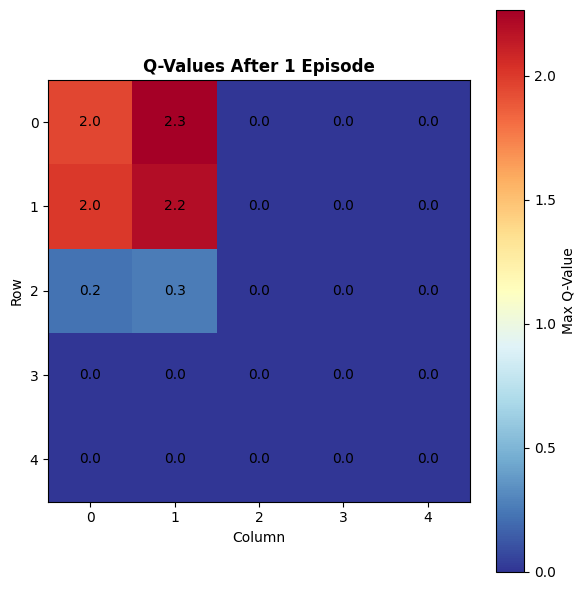

In [35]:
def plot_q_values(q_table, grid_size, title="Q-Value Heatmap"):
    """
    Visualize the maximum Q-value for each state.
    Red = high value (agent learned this is good)
    Blue = low value (agent learned this is bad/far from goal)
    """
    max_q_per_state = np.max(q_table, axis=1)
    max_q_grid = max_q_per_state.reshape(grid_size, grid_size)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(max_q_grid, cmap='RdYlBu_r', interpolation='nearest')
    
    # Add text annotations
    for i in range(grid_size):
        for j in range(grid_size):
            text = ax.text(j, i, f'{max_q_grid[i, j]:.1f}',
                          ha="center", va="center", color="black", fontsize=10)
    
    plt.colorbar(im, ax=ax, label='Max Q-Value')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    plt.tight_layout()
    return fig

# Plot Q-values after 1 episode
fig1 = plot_q_values(q_table, env.grid_size, "Q-Values After 1 Episode")
plt.show()

###  7: Training Multiple Episodes

Now let's train the agent for many episodes. Over time, the Q-values improve, and the agent learns a better policy. We'll track the reward each episode to see if learning is happening.

As episodes progress, the agent should reach the goal faster (more reward per episode) because it's learning which actions work. This creates a learning curve that shows training progress.


In [36]:
def train_q_learning(env, q_table, num_episodes=1000, alpha=0.1, gamma=0.99, 
                     epsilon_start=0.5, epsilon_end=0.01, epsilon_decay=0.995):
    """
    Train agent for multiple episodes.
    
    Parameters:
    - epsilon_decay: decay factor (ε gets multiplied by this each episode)
      This causes the agent to explore less and exploit more over time
    """
    rewards_per_episode = []
    steps_per_episode = []
    epsilon = epsilon_start
    
    for episode in range(num_episodes):
        # Decay epsilon over time
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        
        # Train one episode
        reward, steps, _ = train_episode(env, q_table, alpha, gamma, epsilon)
        
        rewards_per_episode.append(reward)
        steps_per_episode.append(steps)
        
        # Print progress
        if (episode + 1) % 200 == 0:
            avg_reward = np.mean(rewards_per_episode[-200:])
            avg_steps = np.mean(steps_per_episode[-200:])
            print(f"Episode {episode + 1}: Avg Reward = {avg_reward:.1f}, "
                  f"Avg Steps = {avg_steps:.1f}, ε = {epsilon:.4f}")
    
    return np.array(rewards_per_episode), np.array(steps_per_episode)

print("Training agent for 1000 episodes...")
print("(This may take a moment)\n")

rewards, steps = train_q_learning(env, q_table, num_episodes=1000)

print("\n✓ Training complete!")

Training agent for 1000 episodes...
(This may take a moment)

Episode 200: Avg Reward = 43.0, Avg Steps = 100.0, ε = 0.1835
Episode 400: Avg Reward = 82.1, Avg Steps = 100.0, ε = 0.0673
Episode 600: Avg Reward = 94.3, Avg Steps = 100.0, ε = 0.0247
Episode 800: Avg Reward = 97.2, Avg Steps = 100.0, ε = 0.0100
Episode 1000: Avg Reward = 98.9, Avg Steps = 100.0, ε = 0.0100

✓ Training complete!


###  8: Visualizing Learning Progress

Let's plot the learning curve! This shows reward per episode over time. Early episodes should have low reward (agent is clueless), and later episodes should have high reward (agent learned!).

The plot reveals the learning process visually. A steep curve early on means fast learning. A plateau means the agent has converged to a solution. Noise is normal — some episodes are lucky, some aren't.


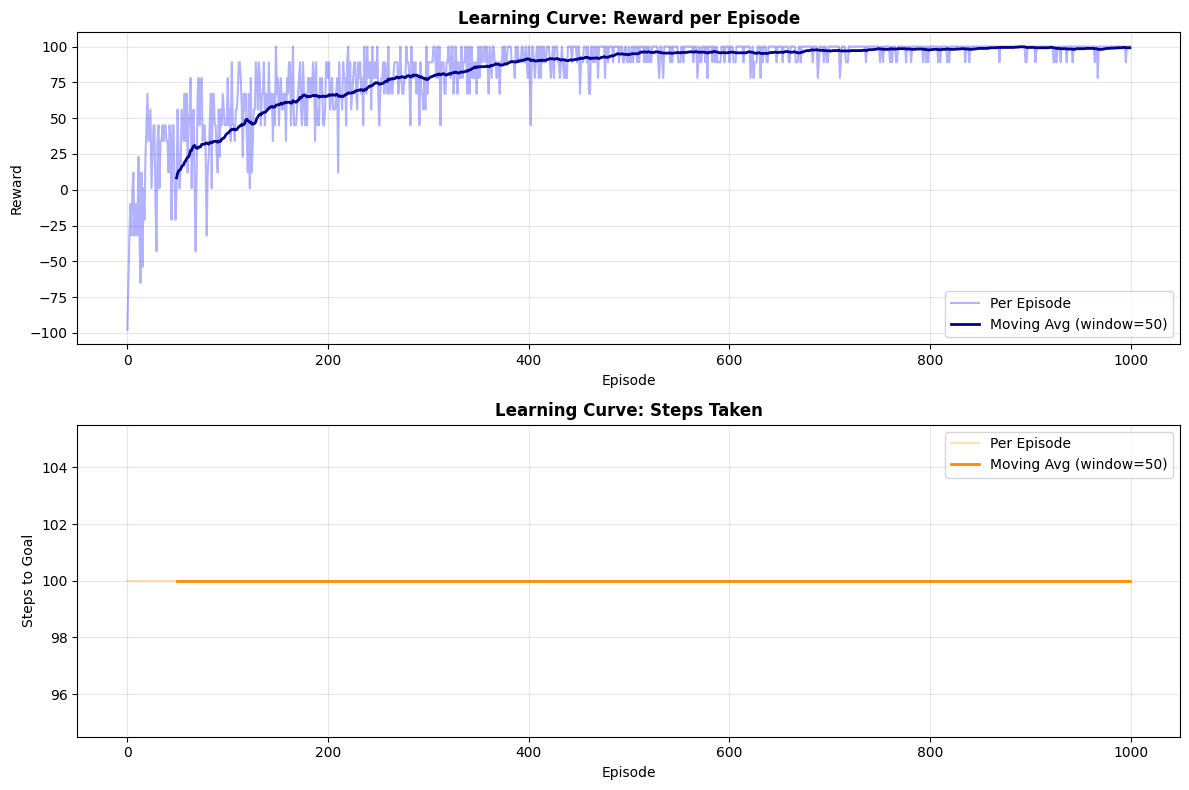

Learning Statistics:
  First 10 episodes avg reward: -27.60
  Last 10 episodes avg reward: 98.90
  First 10 episodes avg steps: 100.00
  Last 10 episodes avg steps: 100.00


In [37]:
def plot_learning_curve(rewards, steps, window=50):
    """
    Plot learning progress: reward and steps per episode.
    Also show moving average (smoother trend line).
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Reward per episode
    ax1.plot(rewards, alpha=0.3, label='Per Episode', color='blue')
    moving_avg_reward = np.convolve(rewards, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(rewards)), moving_avg_reward, 
             label=f'Moving Avg (window={window})', color='darkblue', linewidth=2)
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Reward')
    ax1.set_title('Learning Curve: Reward per Episode', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Steps to goal
    ax2.plot(steps, alpha=0.3, label='Per Episode', color='orange')
    moving_avg_steps = np.convolve(steps, np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(steps)), moving_avg_steps,
             label=f'Moving Avg (window={window})', color='darkorange', linewidth=2)
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps to Goal')
    ax2.set_title('Learning Curve: Steps Taken', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig_curve = plot_learning_curve(rewards, steps, window=50)
plt.show()

print("Learning Statistics:")
print(f"  First 10 episodes avg reward: {rewards[:10].mean():.2f}")
print(f"  Last 10 episodes avg reward: {rewards[-10:].mean():.2f}")
print(f"  First 10 episodes avg steps: {steps[:10].mean():.2f}")
print(f"  Last 10 episodes avg steps: {steps[-10:].mean():.2f}")

###  9: Visualizing Final Q-Values

After training, let's look at the Q-table again. We should see high values near the goal and lower values far from it. This shows the agent learned to value states closer to the goal.

Compare this to the Q-values after 1 episode — the pattern should be much clearer now. The agent has built a useful map of the environment!


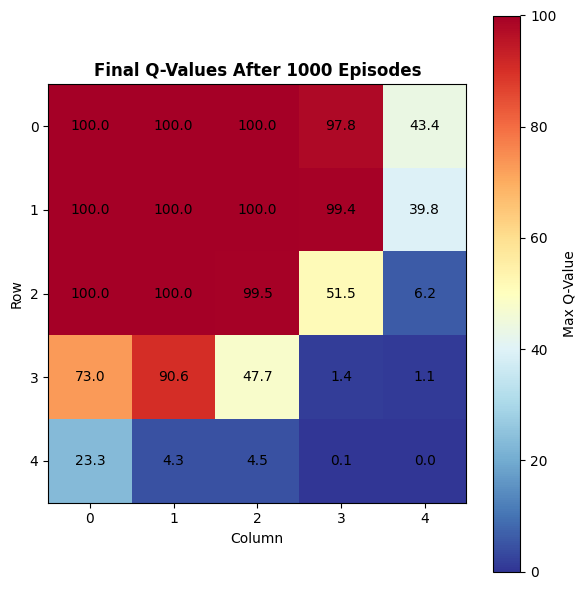


Final Q-table statistics:
  Min Q-value: -4.29
  Max Q-value: 100.00
  Mean Q-value: 38.75


In [38]:
fig_final = plot_q_values(q_table, env.grid_size, "Final Q-Values After 1000 Episodes")
plt.show()

print("\nFinal Q-table statistics:")
print(f"  Min Q-value: {q_table.min():.2f}")
print(f"  Max Q-value: {q_table.max():.2f}")
print(f"  Mean Q-value: {q_table.mean():.2f}")

###  10: Testing the Learned Policy

Now let's test the learned policy. We run episodes without exploration (ε=0) — the agent uses only what it learned. It should consistently reach the goal efficiently.

This is the payoff moment! The agent should perform consistently well, taking a short path from start to goal every time. We can see the actual behavior now.


In [39]:
def run_test_episodes(env, q_table, num_episodes=5, visualize=True):
    """
    Test the learned policy without exploration (ε=0).
    Shows how well the agent learned.
    """
    test_rewards = []
    test_steps = []
    all_paths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        path = [state]
        total_reward = 0
        steps = 0
        
        for _ in range(100):
            # Use learned policy (always pick best action, no exploration)
            action = np.argmax(q_table[state])
            next_state, reward, done = env.step(action)
            
            path.append(next_state)
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                break
        
        test_rewards.append(total_reward)
        test_steps.append(steps)
        all_paths.append(path)
    
    return test_rewards, test_steps, all_paths

# Test the learned policy
test_rewards, test_steps, paths = run_test_episodes(env, q_table, num_episodes=5)

print("Testing learned policy (5 episodes, no exploration):\n")
for i, (reward, num_steps) in enumerate(zip(test_rewards, test_steps)):
    print(f"  Episode {i+1}: Reward = {reward:3.0f}, Steps = {num_steps}")

print(f"\nAverage reward in test: {np.mean(test_rewards):.1f}")
print(f"Average steps in test: {np.mean(test_steps):.1f}")

Testing learned policy (5 episodes, no exploration):

  Episode 1: Reward = 100, Steps = 100
  Episode 2: Reward = 100, Steps = 100
  Episode 3: Reward = 100, Steps = 100
  Episode 4: Reward = 100, Steps = 100
  Episode 5: Reward = 100, Steps = 100

Average reward in test: 100.0
Average steps in test: 100.0


###  11: Visualizing Agent Paths

Let's visualize the paths the agent takes. We'll draw the grid and show the path from start to goal. With a well-trained agent, all paths should be similar and optimal (short).

This gives us a visual understanding of what the agent learned. We can see if it found the most direct route or if it's still making mistakes.


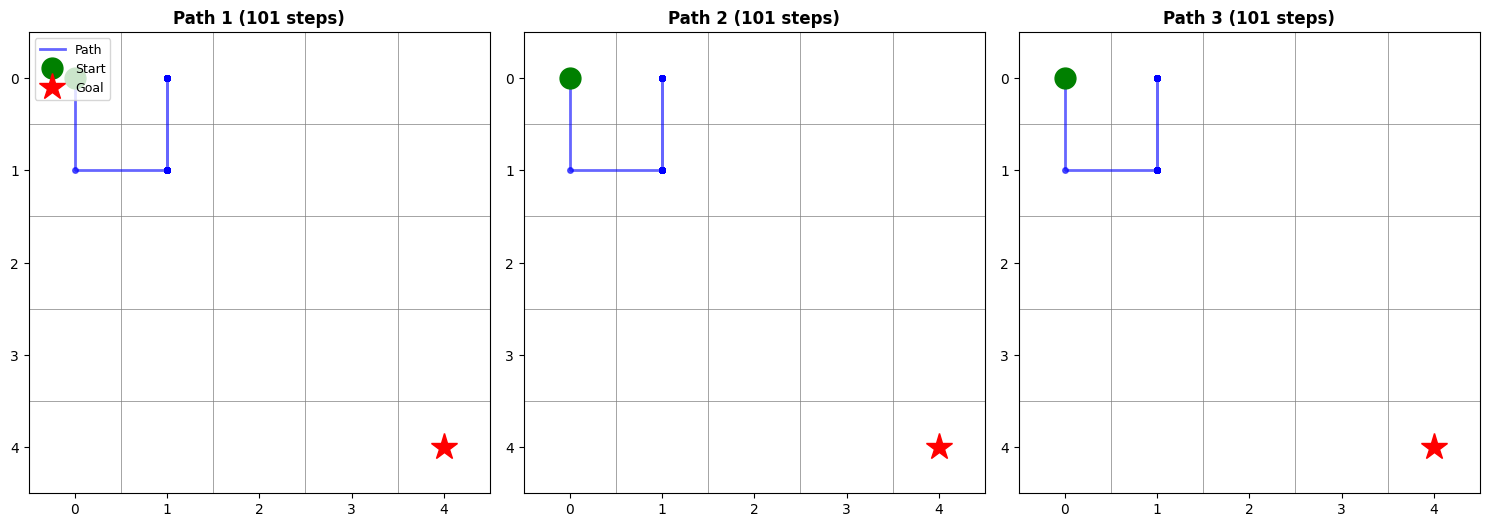

In [40]:
def visualize_paths(env, paths, num_paths=3):
    """
    Draw the grid with agent paths.
    """
    fig, axes = plt.subplots(1, num_paths, figsize=(15, 5))
    if num_paths == 1:
        axes = [axes]
    
    for idx, (ax, path) in enumerate(zip(axes, paths[:num_paths])):
        # Create grid
        ax.set_xlim(-0.5, env.grid_size - 0.5)
        ax.set_ylim(env.grid_size - 0.5, -0.5)
        ax.set_aspect('equal')
        
        # Draw grid
        for i in range(env.grid_size + 1):
            ax.axhline(i - 0.5, color='gray', linewidth=0.5)
            ax.axvline(i - 0.5, color='gray', linewidth=0.5)
        
        # Convert path to coordinates
        coords = [(pos % env.grid_size, pos // env.grid_size) for pos in path]
        xs = [c[0] for c in coords]
        ys = [c[1] for c in coords]
        
        # Draw path
        ax.plot(xs, ys, 'b-', linewidth=2, alpha=0.6, label='Path')
        ax.plot(xs, ys, 'bo', markersize=4, alpha=0.6)
        
        # Mark start and goal
        ax.plot(0, 0, 'go', markersize=15, label='Start')
        ax.plot(env.grid_size - 1, env.grid_size - 1, 'r*', markersize=20, label='Goal')
        
        ax.set_xticks(range(env.grid_size))
        ax.set_yticks(range(env.grid_size))
        ax.set_title(f'Path {idx+1} ({len(path)} steps)', fontweight='bold')
        if idx == 0:
            ax.legend(loc='upper left', fontsize=9)
    
    plt.tight_layout()
    return fig

fig_paths = visualize_paths(env, paths, num_paths=3)
plt.show()

###  12: Analyzing Q-Values for Each Action

Let's look deeper into the Q-table. For each action in each state, we'll see its learned value. This shows the agent's complete knowledge: "In state X, action Y is worth Z."

This analysis reveals the agent's understanding of the problem. Actions that move toward the goal should have higher values. We can verify this makes sense!


In [41]:
def analyze_action_values(env, q_table):
    """
    Show Q-values for each action in selected states.
    """
    # Analyze a few interesting states
    interesting_states = [
        0,  # Start position
        env.grid_size - 1,  # Top-right
        env.grid_size * (env.grid_size - 1),  # Bottom-left
        env.grid_size * env.grid_size - 1  # Goal position
    ]
    
    print("Q-Values for Each Action in Selected States:\n")
    
    for state in interesting_states:
        row = state // env.grid_size
        col = state % env.grid_size
        print(f"State {state} (Position [{row},{col}]):")
        for action, q_val in enumerate(q_table[state]):
            print(f"  {env.actions[action]:6s}: {q_val:7.2f}")
        print()

analyze_action_values(env, q_table)

Q-Values for Each Action in Selected States:

State 0 (Position [0,0]):
  Up    :   88.15
  Down  :  100.00
  Left  :   88.62
  Right :   99.48

State 4 (Position [0,4]):
  Up    :   -2.94
  Down  :    5.76
  Left  :   43.44
  Right :   -4.29

State 20 (Position [4,0]):
  Up    :   23.30
  Down  :    1.57
  Left  :   -0.23
  Right :    0.00

State 24 (Position [4,4]):
  Up    :    0.00
  Down  :    0.00
  Left  :    0.00
  Right :    0.00



###  13: Distribution of Q-Values

Let's visualize how Q-values are distributed. This histogram shows the range of learned values. After training, we should see a distribution concentrated on higher values (the agent learned many good actions) with a long tail to the right (a few excellent actions).

Comparing the distribution before and after training shows how much learning occurred. Before training, all values are zero. After training, they're spread across a range, reflecting the agent's learned knowledge.


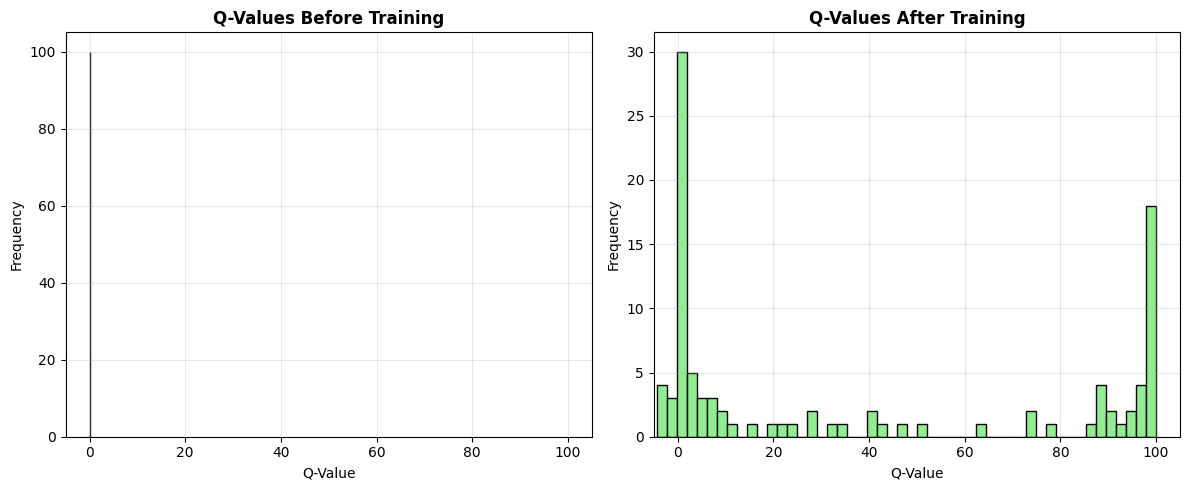

Q-Value Distribution Statistics:
  Initial Q-values: All zeros (0)
  Learned Q-values min: -4.29
  Learned Q-values max: 100.00
  Learned Q-values mean: 38.75
  Learned Q-values std: 43.11


In [42]:
def plot_q_value_distribution(q_table_before, q_table_after):
    """
    Compare Q-value distributions before and after training.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Before training (all zeros)
    ax1.hist(q_table_before.flatten(), bins=50, color='lightcoral', edgecolor='black')
    ax1.set_title('Q-Values Before Training', fontweight='bold')
    ax1.set_xlabel('Q-Value')
    ax1.set_ylabel('Frequency')
    ax1.set_xlim(-5, 105)
    ax1.grid(True, alpha=0.3)
    
    # After training
    ax2.hist(q_table_after.flatten(), bins=50, color='lightgreen', edgecolor='black')
    ax2.set_title('Q-Values After Training', fontweight='bold')
    ax2.set_xlabel('Q-Value')
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(-5, 105)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Create initial Q-table for comparison
q_table_initial = np.zeros((num_states, num_actions))

fig_dist = plot_q_value_distribution(q_table_initial, q_table)
plt.show()

print("Q-Value Distribution Statistics:")
print(f"  Initial Q-values: All zeros (0)")
print(f"  Learned Q-values min: {q_table.min():.2f}")
print(f"  Learned Q-values max: {q_table.max():.2f}")
print(f"  Learned Q-values mean: {q_table.mean():.2f}")
print(f"  Learned Q-values std: {q_table.std():.2f}")

###  14: Effect of Hyperparameters

Different hyperparameters lead to different learning behaviors. Let's train multiple agents with different learning rates and see how it affects learning speed.

Hyperparameters are knobs we can turn to control learning. **α** (learning rate) determines how quickly Q-values update. A high α means fast changes; a low α means gradual learning. The right choice depends on the problem!


Comparing different learning rates...

Training with α = 0.05...
Episode 200: Avg Reward = 25.8, Avg Steps = 100.0, ε = 0.1101
Episode 400: Avg Reward = 70.4, Avg Steps = 100.0, ε = 0.0404
Training with α = 0.1...
Episode 200: Avg Reward = 39.0, Avg Steps = 100.0, ε = 0.1101
Episode 400: Avg Reward = 72.3, Avg Steps = 100.0, ε = 0.0404
Training with α = 0.3...
Episode 200: Avg Reward = 105.7, Avg Steps = 12.0, ε = 0.1101
Episode 400: Avg Reward = 106.5, Avg Steps = 8.8, ε = 0.0404


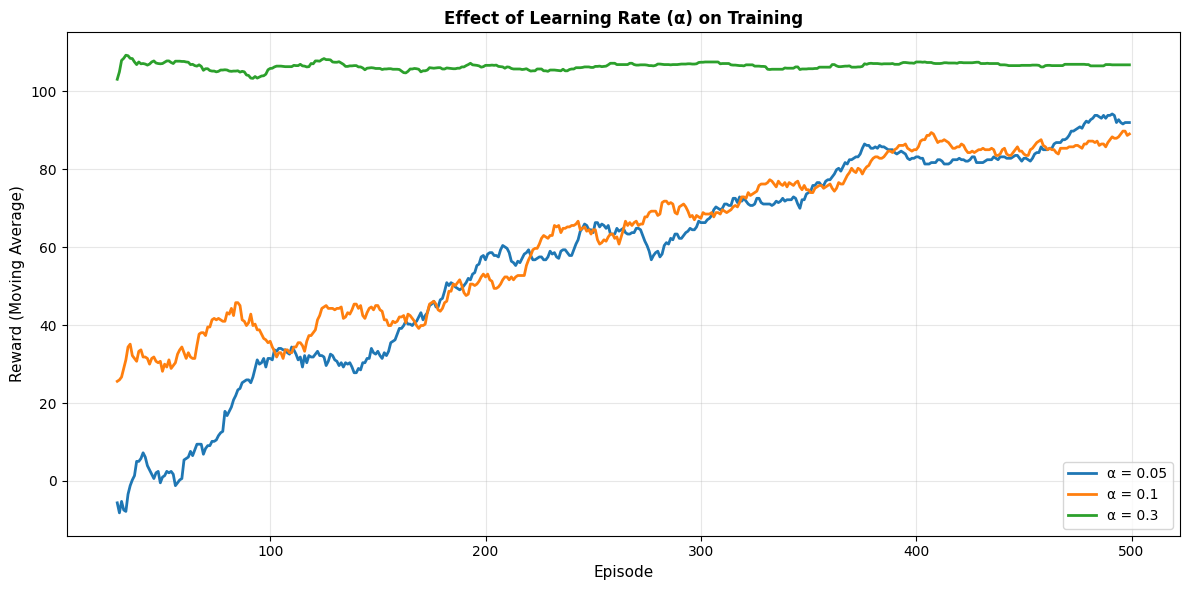

In [43]:
def train_and_compare_alphas(env, alphas=[0.05, 0.1, 0.3, 0.5]):
    """
    Train agents with different learning rates and compare.
    """
    results = {}
    
    for alpha in alphas:
        print(f"Training with α = {alpha}...")
        q_table_temp = initialize_q_table(num_states, num_actions)
        rewards_temp, _ = train_q_learning(env, q_table_temp, num_episodes=500, 
                                           alpha=alpha, gamma=0.99, epsilon_start=0.3)
        results[alpha] = rewards_temp
    
    # Plot comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    window = 30
    
    for alpha in alphas:
        moving_avg = np.convolve(results[alpha], np.ones(window)/window, mode='valid')
        ax.plot(range(window-1, len(results[alpha])), moving_avg, 
                label=f'α = {alpha}', linewidth=2)
    
    ax.set_xlabel('Episode', fontsize=11)
    ax.set_ylabel('Reward (Moving Average)', fontsize=11)
    ax.set_title('Effect of Learning Rate (α) on Training', fontweight='bold', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return results, fig

print("Comparing different learning rates...\n")
alpha_results, fig_alpha = train_and_compare_alphas(env, alphas=[0.05, 0.1, 0.3])
plt.show()

###  15: Effect of Exploration Rate (Epsilon)

Now let's test how the exploration rate affects learning. Too much exploration means the agent wastes time trying random actions. Too little means it doesn't explore enough to find good strategies.

The balance is critical. High ε early on lets the agent explore and discover useful strategies. Reducing ε over time (epsilon decay) lets it exploit what it learned. This is why we use ε-decay!


Comparing different epsilon decay rates...

Training with ε decay = 0.98...
Episode 200: Avg Reward = 73.1, Avg Steps = 98.0, ε = 0.0100
Episode 400: Avg Reward = 97.3, Avg Steps = 100.0, ε = 0.0100
Training with ε decay = 0.995...
Episode 200: Avg Reward = -13.4, Avg Steps = 100.0, ε = 0.1835
Episode 400: Avg Reward = 58.9, Avg Steps = 100.0, ε = 0.0673
Training with ε decay = 0.999...
Episode 200: Avg Reward = 28.5, Avg Steps = 99.5, ε = 0.4093
Episode 400: Avg Reward = 45.3, Avg Steps = 99.6, ε = 0.3351


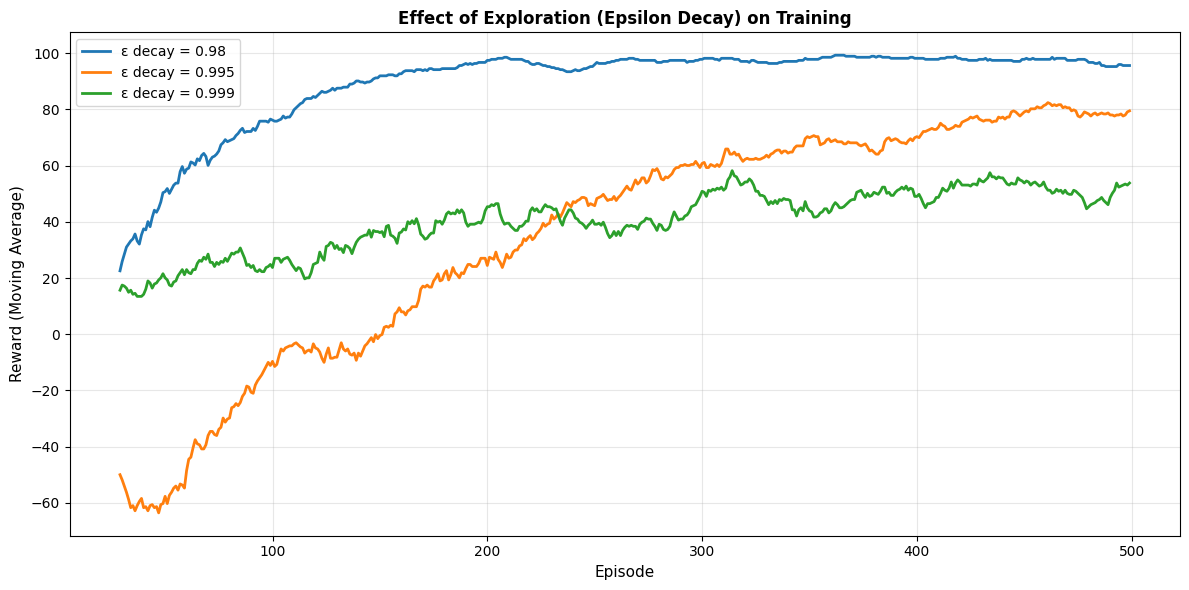

In [44]:
def compare_epsilon_strategies(env, epsilon_decays=[0.99, 0.995, 0.999]):
    """
    Train agents with different epsilon decay rates.
    Higher decay = slower exploration reduction = more total exploration.
    """
    results = {}
    
    for decay in epsilon_decays:
        print(f"Training with ε decay = {decay}...")
        q_table_temp = initialize_q_table(num_states, num_actions)
        rewards_temp, _ = train_q_learning(env, q_table_temp, num_episodes=500, 
                                           alpha=0.1, epsilon_decay=decay)
        results[decay] = rewards_temp
    
    # Plot comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    window = 30
    
    for decay in epsilon_decays:
        moving_avg = np.convolve(results[decay], np.ones(window)/window, mode='valid')
        ax.plot(range(window-1, len(results[decay])), moving_avg, 
                label=f'ε decay = {decay}', linewidth=2)
    
    ax.set_xlabel('Episode', fontsize=11)
    ax.set_ylabel('Reward (Moving Average)', fontsize=11)
    ax.set_title('Effect of Exploration (Epsilon Decay) on Training', 
                 fontweight='bold', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return results, fig

print("Comparing different epsilon decay rates...\n")
epsilon_results, fig_epsilon = compare_epsilon_strategies(env, epsilon_decays=[0.98, 0.995, 0.999])
plt.show()

###  16: The Role of Discount Factor (Gamma)

The discount factor γ controls how much the agent values future rewards. γ = 0 means only immediate rewards matter. γ = 1 means all future rewards matter equally. Usually, γ ≈ 0.99 is good.

Think of it like time value of money: a reward now is better than the same reward later. γ encodes this preference. In our grid world, distant goals require γ close to 1; immediate goals need lower γ.


Comparing different gamma values...

Training with γ = 0.5...
Episode 200: Avg Reward = 3.3, Avg Steps = 96.9, ε = 0.1835
Episode 400: Avg Reward = 58.3, Avg Steps = 99.8, ε = 0.0673
Training with γ = 0.9...
Episode 200: Avg Reward = 13.5, Avg Steps = 100.0, ε = 0.1835
Episode 400: Avg Reward = 55.9, Avg Steps = 100.0, ε = 0.0673
Training with γ = 0.99...
Episode 200: Avg Reward = 73.5, Avg Steps = 33.1, ε = 0.1835
Episode 400: Avg Reward = 106.3, Avg Steps = 9.5, ε = 0.0673


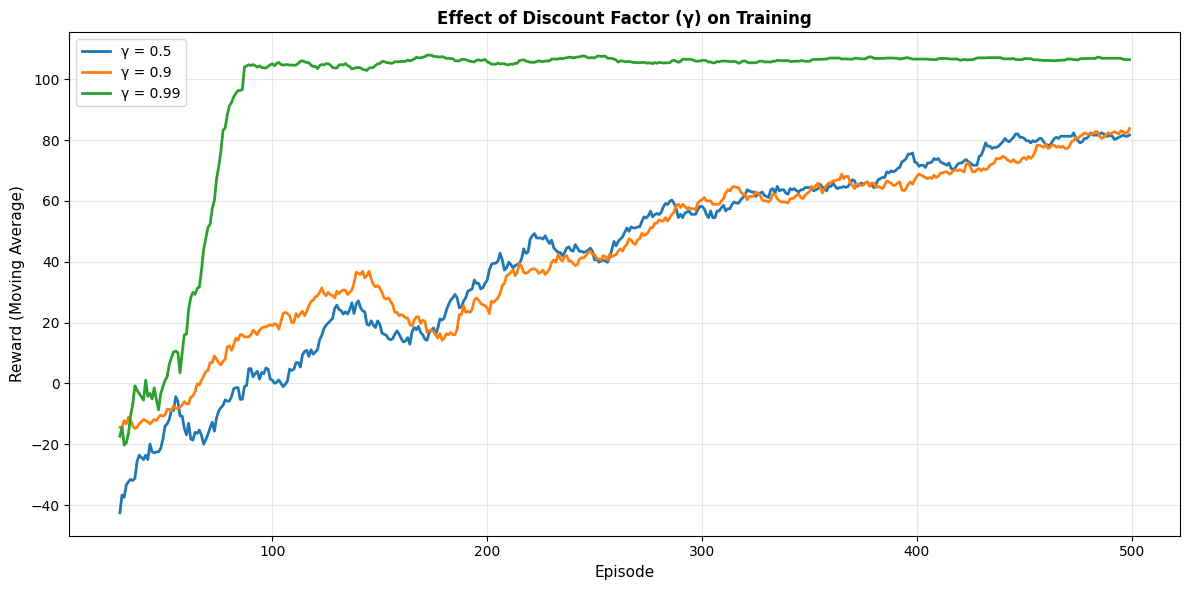

In [45]:
def compare_gamma_values(env, gammas=[0.5, 0.9, 0.99]):
    """
    Train agents with different discount factors.
    """
    results = {}
    
    for gamma in gammas:
        print(f"Training with γ = {gamma}...")
        q_table_temp = initialize_q_table(num_states, num_actions)
        rewards_temp, _ = train_q_learning(env, q_table_temp, num_episodes=500, 
                                           alpha=0.1, gamma=gamma)
        results[gamma] = rewards_temp
    
    # Plot comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    window = 30
    
    for gamma in gammas:
        moving_avg = np.convolve(results[gamma], np.ones(window)/window, mode='valid')
        ax.plot(range(window-1, len(results[gamma])), moving_avg, 
                label=f'γ = {gamma}', linewidth=2)
    
    ax.set_xlabel('Episode', fontsize=11)
    ax.set_ylabel('Reward (Moving Average)', fontsize=11)
    ax.set_title('Effect of Discount Factor (γ) on Training', 
                 fontweight='bold', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return results, fig

print("Comparing different gamma values...\n")
gamma_results, fig_gamma = compare_gamma_values(env, gammas=[0.5, 0.9, 0.99])
plt.show()

###  17: Creating a Policy Visualization

Let's create a visual representation of the learned policy — arrows showing the best action in each state. This is what the agent learned: a map of where to go from each position.

A good policy shows arrows pointing toward the goal. The agent should have learned: "Up and left from bottom-right" or "Down and right from top-left." This is the culmination of its learning!


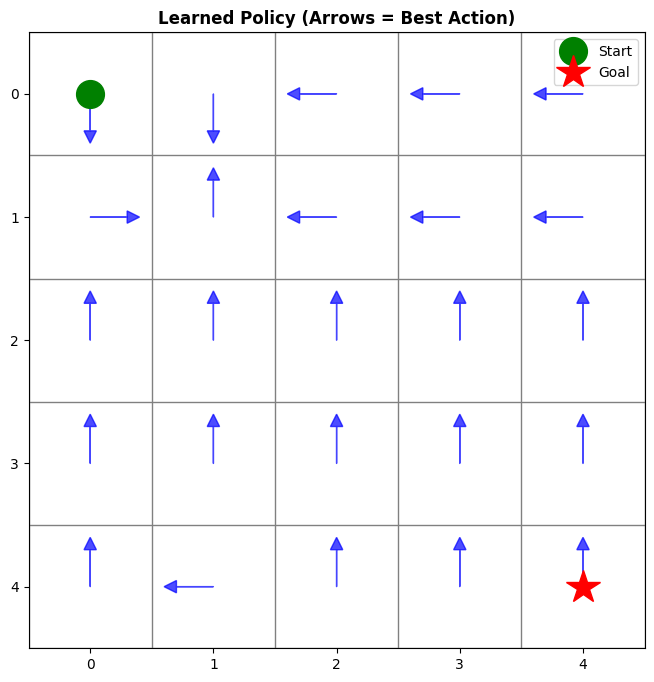

✓ Policy visualization created
  Each arrow shows the best action learned for that position


In [46]:
def visualize_policy(env, q_table):
    """
    Visualize the learned policy as arrows.
    Each arrow points in the direction of the best action from each state.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create grid
    for i in range(env.grid_size + 1):
        ax.axhline(i - 0.5, color='gray', linewidth=1)
        ax.axvline(i - 0.5, color='gray', linewidth=1)
    
    # Arrow directions for each action
    arrow_directions = {
        0: (0, -0.3),   # Up
        1: (0, 0.3),    # Down
        2: (-0.3, 0),   # Left
        3: (0.3, 0)     # Right
    }
    
    # For each state, draw arrow in direction of best action
    for state in range(num_states):
        best_action = np.argmax(q_table[state])
        row = state // env.grid_size
        col = state % env.grid_size
        
        dx, dy = arrow_directions[best_action]
        ax.arrow(col, row, dx, dy, head_width=0.1, head_length=0.1, 
                fc='blue', ec='blue', alpha=0.7)
    
    # Mark start and goal
    ax.plot(0, 0, 'go', markersize=20, label='Start', zorder=5)
    ax.plot(env.grid_size - 1, env.grid_size - 1, 'r*', markersize=25, 
            label='Goal', zorder=5)
    
    ax.set_xlim(-0.5, env.grid_size - 0.5)
    ax.set_ylim(env.grid_size - 0.5, -0.5)
    ax.set_aspect('equal')
    ax.set_xticks(range(env.grid_size))
    ax.set_yticks(range(env.grid_size))
    ax.set_title('Learned Policy (Arrows = Best Action)', fontweight='bold', fontsize=12)
    ax.legend(fontsize=10)
    
    return fig

fig_policy = visualize_policy(env, q_table)
plt.show()

print("✓ Policy visualization created")
print("  Each arrow shows the best action learned for that position")

###  18: Advanced: State-Action Value Heatmap

Let's create a more sophisticated visualization showing the Q-values for a specific action across all states. This reveals which states benefit most from that action.

For example, the "Down" action should have high values in states above the goal — the agent learned that moving down helps reach the goal from there!


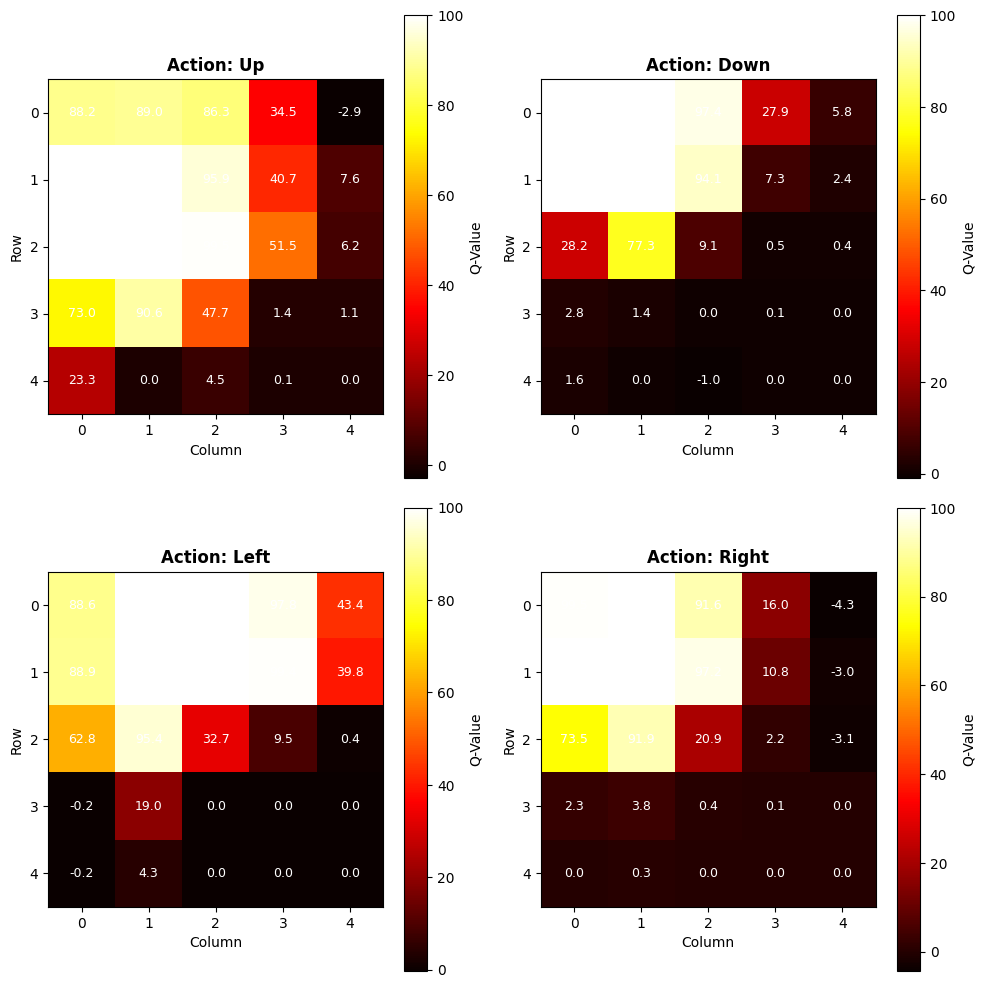

✓ Action-specific Q-value heatmaps created


In [47]:
def plot_action_heatmaps(env, q_table):
    """
    Show heatmaps of Q-values for each action separately.
    """
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()
    
    for action in range(len(env.actions)):
        q_values_action = q_table[:, action]
        q_grid = q_values_action.reshape(env.grid_size, env.grid_size)
        
        im = axes[action].imshow(q_grid, cmap='hot', interpolation='nearest')
        
        # Add text
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                text = axes[action].text(j, i, f'{q_grid[i, j]:.1f}',
                                        ha="center", va="center", 
                                        color="white", fontsize=9)
        
        plt.colorbar(im, ax=axes[action], label='Q-Value')
        axes[action].set_title(f'Action: {env.actions[action]}', fontweight='bold')
        axes[action].set_xlabel('Column')
        axes[action].set_ylabel('Row')
    
    plt.tight_layout()
    return fig

fig_actions = plot_action_heatmaps(env, q_table)
plt.show()

print("✓ Action-specific Q-value heatmaps created")

###  19: Convergence Analysis

Let's analyze whether the Q-table converged (stopped changing significantly). We'll compare Q-values across training phases to see when learning plateaued.

Convergence is important: it means the agent has learned as much as it can and further training won't improve it significantly. Early convergence might mean the problem was easy; slow convergence might mean we need better hyperparameters.


Analyzing convergence...


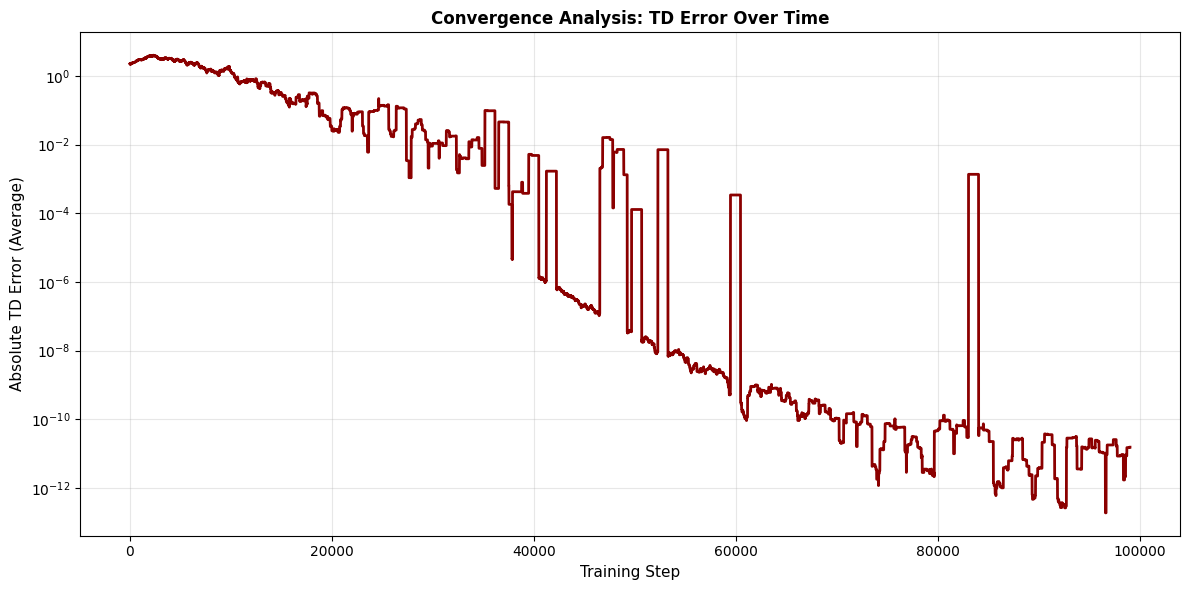

✓ Convergence analysis complete
  Final TD error: 0.000000
  Initial TD error: 2.239484


In [48]:
def analyze_convergence(env, num_episodes=1000):
    """
    Track how much Q-values change over time.
    """
    q_table_conv = initialize_q_table(num_states, num_actions)
    q_snapshots = []
    td_errors = []
    
    for episode in range(num_episodes):
        state = env.reset()
        epsilon = max(0.01, 0.5 * (0.995 ** episode))
        
        for _ in range(100):
            action = choose_action_epsilon_greedy(state, q_table_conv, epsilon, num_actions)
            next_state, reward, done = env.step(action)
            td_error = update_q_table(q_table_conv, state, action, reward, 
                                     next_state, alpha=0.1, gamma=0.99)
            td_errors.append(abs(td_error))
            state = next_state
            if done:
                break
        
        # Record Q-table snapshot every 50 episodes
        if (episode + 1) % 50 == 0:
            q_snapshots.append(q_table_conv.copy())
    
    # Calculate average TD error over time (smoothed)
    smoothed_td_errors = np.convolve(td_errors, np.ones(1000)/1000, mode='valid')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(range(len(smoothed_td_errors)), smoothed_td_errors, linewidth=2, color='darkred')
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Absolute TD Error (Average)', fontsize=11)
    ax.set_title('Convergence Analysis: TD Error Over Time', fontweight='bold', fontsize=12)
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return fig, smoothed_td_errors

print("Analyzing convergence...")
fig_conv, td_errors = analyze_convergence(env, num_episodes=1000)
plt.show()

print("✓ Convergence analysis complete")
print(f"  Final TD error: {td_errors[-1]:.6f}")
print(f"  Initial TD error: {td_errors[0]:.6f}")

###  20: Summary and Key Takeaways

Let's summarize what we learned and create a comprehensive visual summary of the entire Q-Learning process.

This section ties everything together: the theory, the implementation, the results. It shows how an agent starts knowing nothing and learns a complex behavior through interaction with the environment!


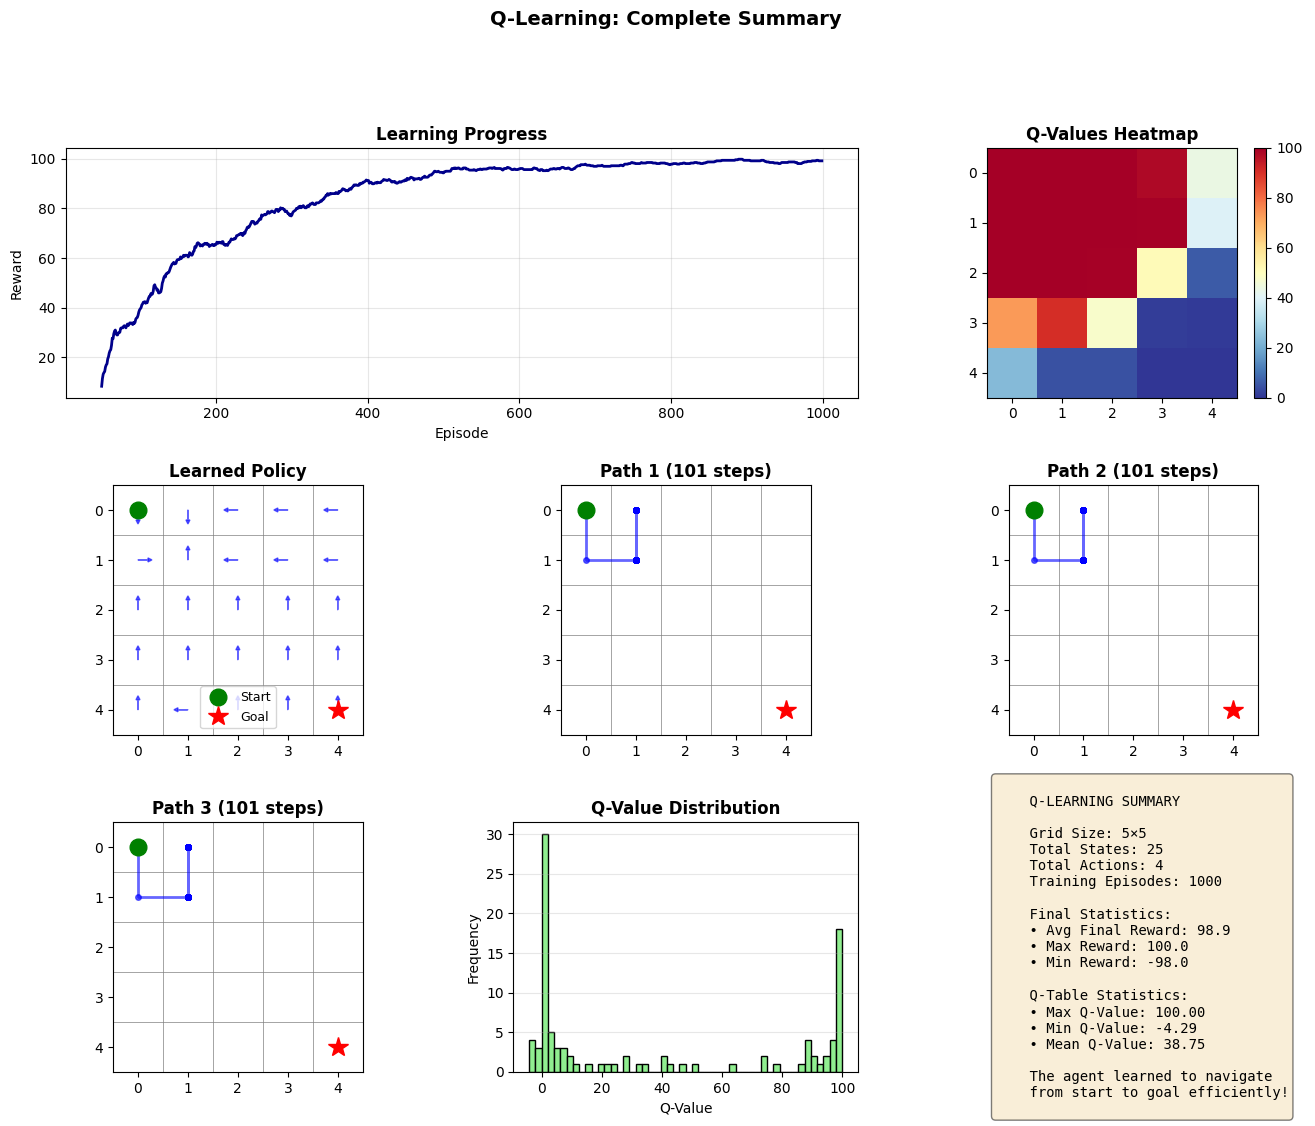

In [49]:
def create_summary_figure(env, q_table, rewards, paths):
    """
    Create a comprehensive summary figure showing all aspects of Q-Learning.
    """
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)
    
    # 1. Learning curve
    ax1 = fig.add_subplot(gs[0, :2])
    window = 50
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(rewards)), moving_avg, linewidth=2, color='darkblue')
    ax1.set_title('Learning Progress', fontweight='bold')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Reward')
    ax1.grid(True, alpha=0.3)
    
    # 2. Final Q-values heatmap
    ax2 = fig.add_subplot(gs[0, 2])
    max_q_per_state = np.max(q_table, axis=1)
    max_q_grid = max_q_per_state.reshape(env.grid_size, env.grid_size)
    im = ax2.imshow(max_q_grid, cmap='RdYlBu_r')
    ax2.set_title('Q-Values Heatmap', fontweight='bold')
    plt.colorbar(im, ax=ax2)
    
    # 3. Policy visualization
    ax3 = fig.add_subplot(gs[1, 0])
    for i in range(env.grid_size + 1):
        ax3.axhline(i - 0.5, color='gray', linewidth=0.5)
        ax3.axvline(i - 0.5, color='gray', linewidth=0.5)
    
    arrow_directions = {0: (0, -0.2), 1: (0, 0.2), 2: (-0.2, 0), 3: (0.2, 0)}
    for state in range(num_states):
        best_action = np.argmax(q_table[state])
        row = state // env.grid_size
        col = state % env.grid_size
        dx, dy = arrow_directions[best_action]
        ax3.arrow(col, row, dx, dy, head_width=0.08, head_length=0.08, fc='blue', ec='blue', alpha=0.6)
    
    ax3.plot(0, 0, 'go', markersize=12, label='Start')
    ax3.plot(env.grid_size - 1, env.grid_size - 1, 'r*', markersize=15, label='Goal')
    ax3.set_xlim(-0.5, env.grid_size - 0.5)
    ax3.set_ylim(env.grid_size - 0.5, -0.5)
    ax3.set_aspect('equal')
    ax3.set_title('Learned Policy', fontweight='bold')
    ax3.legend(fontsize=9)
    
    # 4-6. Sample paths
    for idx in range(3):
        ax = fig.add_subplot(gs[1, idx+1] if idx < 2 else gs[2, 0])
        
        for i in range(env.grid_size + 1):
            ax.axhline(i - 0.5, color='gray', linewidth=0.5)
            ax.axvline(i - 0.5, color='gray', linewidth=0.5)
        
        path = paths[idx] if idx < len(paths) else paths[0]
        coords = [(pos % env.grid_size, pos // env.grid_size) for pos in path]
        xs = [c[0] for c in coords]
        ys = [c[1] for c in coords]
        
        ax.plot(xs, ys, 'b-', linewidth=2, alpha=0.6)
        ax.plot(xs, ys, 'bo', markersize=4, alpha=0.6)
        ax.plot(0, 0, 'go', markersize=12)
        ax.plot(env.grid_size - 1, env.grid_size - 1, 'r*', markersize=15)
        
        ax.set_xlim(-0.5, env.grid_size - 0.5)
        ax.set_ylim(env.grid_size - 0.5, -0.5)
        ax.set_aspect('equal')
        ax.set_title(f'Path {idx+1} ({len(path)} steps)', fontweight='bold')
    
    # 7. Q-value distribution
    ax7 = fig.add_subplot(gs[2, 1])
    ax7.hist(q_table.flatten(), bins=50, color='lightgreen', edgecolor='black')
    ax7.set_title('Q-Value Distribution', fontweight='bold')
    ax7.set_xlabel('Q-Value')
    ax7.set_ylabel('Frequency')
    ax7.grid(True, alpha=0.3, axis='y')
    
    # 8. Statistics
    ax8 = fig.add_subplot(gs[2, 2])
    ax8.axis('off')
    stats_text = f"""
    Q-LEARNING SUMMARY

    Grid Size: {env.grid_size}×{env.grid_size}
    Total States: {num_states}
    Total Actions: {num_actions}
    Training Episodes: 1000
    
    Final Statistics:
    • Avg Final Reward: {rewards[-10:].mean():.1f}
    • Max Reward: {rewards.max():.1f}
    • Min Reward: {rewards.min():.1f}
    
    Q-Table Statistics:
    • Max Q-Value: {q_table.max():.2f}
    • Min Q-Value: {q_table.min():.2f}
    • Mean Q-Value: {q_table.mean():.2f}
    
    The agent learned to navigate
    from start to goal efficiently!
    """
    ax8.text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center',
             family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    fig.suptitle('Q-Learning: Complete Summary', fontsize=14, fontweight='bold', y=0.995)
    
    return fig

fig_summary = create_summary_figure(env, q_table, rewards, paths)
plt.show()


### Q-LEARNING KEY CONCEPTS REVIEW


1. MARKOV DECISION PROCESS (MDP)
   - State (S): The agent's current situation
   - Action (A): What the agent can do
   - Reward (R): Feedback from the environment
   - Transition: How the environment changes given state and action
   - Q-Learning solves MDPs by learning state-action values

2. Q-VALUE
   - Q(s,a) = expected cumulative reward for taking action 'a' in state 's'
   - Higher Q-value means that action is better in that state
   - Q-Learning updates Q-values based on experience

3. THE Q-LEARNING UPDATE RULE
   Q(s,a) ← Q(s,a) + α[R + γ·max(Q(s',a')) - Q(s,a)]
   
   Components:
   - α (alpha): Learning rate - how much to update (0.1 = 10% change)
   - R: Immediate reward received
   - γ (gamma): Discount factor - importance of future rewards (0.99 = very important)
   - max(Q(s',a')): Best possible value from next state

4. EXPLORATION VS EXPLOITATION
   - Exploration: Try random actions to discover new strategies
   - Exploitation: Use learned strategy to maximize reward
   - ε-Greedy: With probability ε explore, else exploit
   - ε-Decay: Gradually decrease ε to explore less over time

5. CONVERGENCE
   - Q-Learning converges to optimal Q-values as episodes increase
   - Convergence means further training doesn't improve much
   - TD-error decreases as learning progresses

6. POLICY
   - Policy π(s) = the action to take in state s
   - Greedy policy: π(s) = argmax_a Q(s,a)
   - Q-Learning learns an optimal greedy policy

7. ADVANTAGES & LIMITATIONS
   -  Simple and effective for discrete problems
   -  Off-policy: can learn from any behavior
   -  No model needed: learns directly from experience
   -  Doesn't scale to huge state spaces (use Deep Q-Networks)
   -  Requires discrete actions (use continuous RL for robotics)
   -  Slow to converge on complex problems

8. REAL-WORLD APPLICATIONS
   - Game AI (Atari, Chess, Go) → Deep Q-Learning
   - Robot control (navigation, grasping)
   - Traffic signal optimization
   - Resource allocation in data centers
   - Recommendation systems